In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [29]:
NUM_EPOCHS = 100

#Declaring necessary methods and defining model

Here simple polynomial regressions with 3 parameters is declared. Parameters are all initialized with ones. For training MSE with L1 regularization with mini-bathc gradient method is used.

In [30]:
def loss(y_true, y_pred, lamb, params):
    return tf.reduce_mean(tf.square(y_true - y_pred)) + lamb*tf.reduce_sum(tf.abs(params))

In [31]:
def grad_step(model, inputs, outputs, learning_rate, l1_lamb):
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs, l1_lamb, model.get_parameters())
        grads = tape.gradient(current_loss, model.get_parameters())

    for i in range(len(grads)):
        model.params[i].assign_sub(learning_rate * grads[i])
        
    return current_loss

In [32]:
def train(model, train_dataset, num_epochs, learning_rate, l1_lamb):
    for epoch in range(1, num_epochs + 1):
        for i, batch in enumerate(train_dataset):
            data, expected = batch
            loss_val = grad_step(model, data, expected, learning_rate, l1_lamb)

        if epoch%10==0:
            print('Epoch {:4d} Loss {:6.4f}'.format(int(epoch), loss_val))
    model.save_weights(f"./drive/MyDrive/ColabData/IS_1/{model.name}/")

# Using generated dataset

In [33]:
X_data = np.linspace(-1, 1, 100)
num_coef=3
coef =[1, 2, 3]
y_data=0

for i in range (num_coef):
    y_data += coef[i]*np.power (X_data, i)
    y_data += np.random.randn(*X_data.shape)*0.5

Text(0, 0.5, 'y - axis')

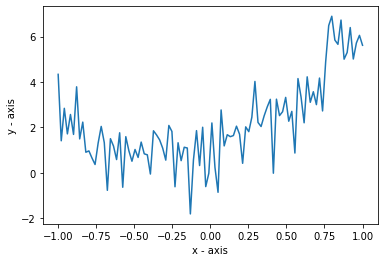

In [34]:
plt.plot(X_data, y_data)
plt.xlabel('x - axis')
plt.ylabel('y - axis')

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_data[:80], tf.float32),
     tf.cast(y_data[:80], tf.float32))
).batch(10)

In [36]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.params = [
            tf.Variable(1.0, name='a'), 
            tf.Variable(1.0, name='b'), 
            tf.Variable(1.0, name='c')
        ]

    def call(self, x):
        return self.params[0]*x**2 + self.params[1]*x + self.params[2]

    def get_parameters(self):
        return self.params

In [37]:
model = MyModel()
model.build(input_shape=(None, 1))

In [38]:
learning_rate = 0.01
l1_lamb = 0.001

In [39]:
train(model, train_dataset, NUM_EPOCHS, learning_rate, l1_lamb)

Epoch   10 Loss 1.4389
Epoch   20 Loss 1.3674
Epoch   30 Loss 1.3359
Epoch   40 Loss 1.3135
Epoch   50 Loss 1.2954
Epoch   60 Loss 1.2804
Epoch   70 Loss 1.2679
Epoch   80 Loss 1.2575
Epoch   90 Loss 1.2490
Epoch  100 Loss 1.2420


In [40]:
y_pred = model.predict(X_data)

4/4 [==============================] - 0s 2ms/step


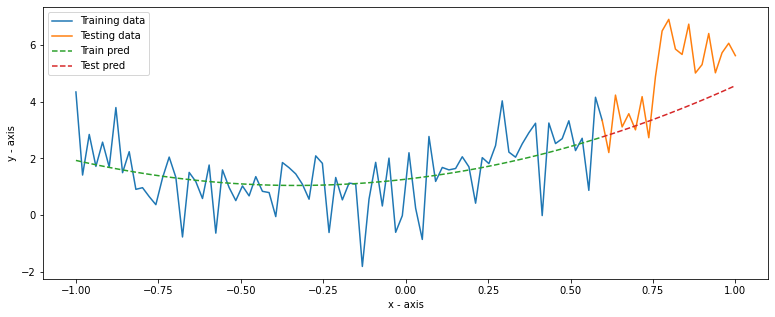

In [41]:
fig = plt.figure(figsize=(13, 5))
plt.plot(X_data[:80], y_data[:80])
plt.plot(X_data[79:], y_data[79:])
plt.plot(X_data[:80], y_pred[:80], '--')
plt.plot(X_data[79:], y_pred[79:], '--')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.legend(["Training data", 'Testing data', 'Train pred', "Test pred"])

# sklearn.datasets.load_diabetes

In [42]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

Text(0, 0.5, 'y - axis')

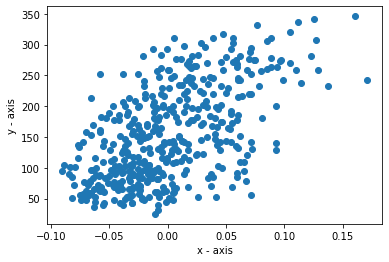

In [43]:
plt.scatter(diabetes_X, diabetes_y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')

In [44]:
diabetes_train_dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(diabetes_X[:400], tf.float32),
     tf.cast(diabetes_y[:400], tf.float32))
).batch(25)

In [45]:
class DiabModel(tf.keras.Model):
    def __init__(self):
        super(DiabModel, self).__init__()
        self.params = [
            tf.Variable(0.0, name='a'), 
            tf.Variable(0.0, name='b'),
            tf.Variable(0.0, name='c'),
        ]

    def call(self, x):
        return self.params[0]*x**2 + self.params[1]*x + self.params[2]

    def get_parameters(self):
        return self.params

In [46]:
diabetis_model = DiabModel()
model.build(input_shape=(None, 1))

In [47]:
learning_rate = 0.1
l1_lamb = 0.001

In [48]:
train(diabetis_model, diabetes_train_dataset, NUM_EPOCHS, learning_rate, l1_lamb)

Epoch   10 Loss 6826.5142
Epoch   20 Loss 6825.7891
Epoch   30 Loss 6825.1709
Epoch   40 Loss 6824.6455
Epoch   50 Loss 6824.2002
Epoch   60 Loss 6823.8218
Epoch   70 Loss 6823.5029
Epoch   80 Loss 6823.2344
Epoch   90 Loss 6823.0088
Epoch  100 Loss 6822.8203


In [49]:
diabetes_y_pred = diabetis_model.predict(diabetes_X)

14/14 [==============================] - 0s 1ms/step


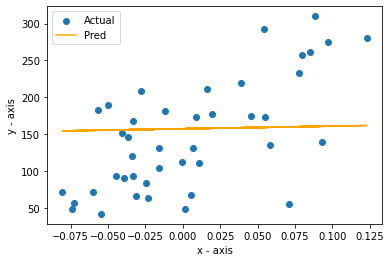

In [50]:
plt.scatter(diabetes_X[400:], diabetes_y[400:])
plt.plot(diabetes_X[400:], diabetes_y_pred[400:], color="orange")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.legend(["Actual", "Pred"])

In [52]:
constant = tf.constant([1, 2, 3])
new_type = tf.cast(constant, tf.float32)
new_type

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [53]:
constant = tf.zeros(shape=(10))
new_shape = tf.reshape(constant, shape=(2, 5))
new_shape.shape

TensorShape([2, 5])

In [54]:
constant = tf.zeros(shape=(3,2))
new_shape = tf.transpose(constant)
new_shape.shape

TensorShape([2, 3])

In [55]:
constant = tf.zeros(shape=(1,2,1,3,1,1))
new_shape = tf.squeeze(constant)
new_shape.shape

TensorShape([2, 3])